In [1]:
from artm_experiments import Experiment, Pool, GreedyTopicsFilter, ConvexHullTopicsFilter, OptimizationTopicsFilter
from artm import *
import glob
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
batch_vectorizer = BatchVectorizer(data_path='kos', data_format='batches')

def create_model():
    model_artm = ARTM(num_topics=50,
                      scores=[PerplexityScore(name='PerplexityScore',
                                              use_unigram_document_model=False,
                                              dictionary_name='dictionary')],
                      regularizers=[SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.2),
                                    DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=2.5e+5)])

    #model_artm.gather_dictionary(dictionary_target_name='dictionary', 
    #                             data_path='kos', vocab_file_path='vocab.kos.txt')
    #model_artm.save_dictionary(dictionary_name='dictionary', dictionary_path='kos/dictionary.dict')
    model_artm.load_dictionary(dictionary_name='dictionary', dictionary_path='kos/dictionary.dict')
    model_artm.initialize(dictionary_name='dictionary', seed=np.random.randint(1000000))

    return model_artm

In [3]:
def display_points(phi):
    points = ConvexHullTopicsFilter.project_points(phi.as_matrix().T, dim=2)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(points[:, 0], points[:, 1], marker='o', ls='')
    for i in xrange(phi.shape[1]):
        ax.annotate(phi.columns[i], xy=points[i], textcoords='offset points')
        
    plt.show()
    
def save_hist(vals, bins, filename):
    bins = (bins[:-1] + bins[1:]) / 2.0
    np.savetxt(filename, np.vstack((bins, vals)).T, delimiter=',')

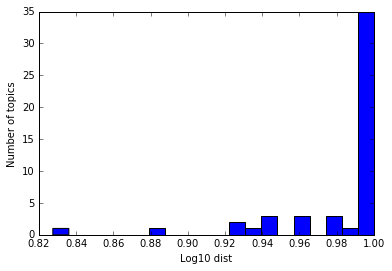

50


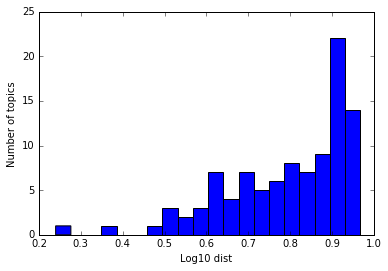

98


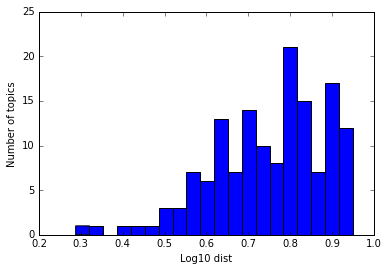

146


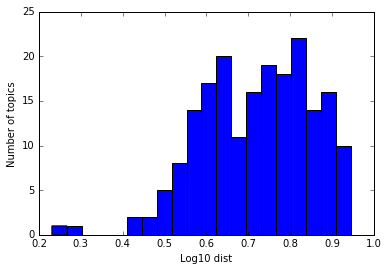

194


KeyboardInterrupt: 

In [4]:
exp = Experiment(Pool(topics_filter=OptimizationTopicsFilter(eps=0.4, verbose=False), 
                      save_topics=True))
for i in xrange(10):
    model_artm = create_model()
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15, num_document_passes=1)
    #display_points(model_artm.get_phi())
    exp.collect_topics(model_artm.get_phi(), model_artm.get_theta())
    vals, bins = exp.topics_pool.topics_filter.plot_hist()
    save_hist(vals, bins, "data_iter_{}.csv".format(i))
    print exp.topics_pool.get_basic_topics_count()

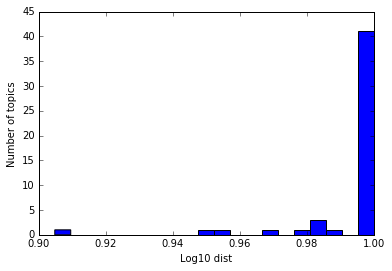

50


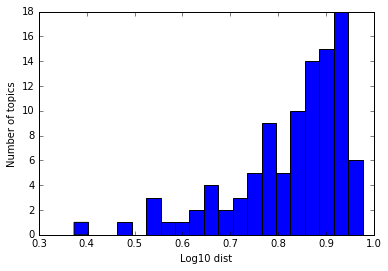

93


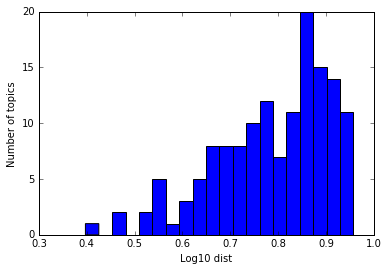

132


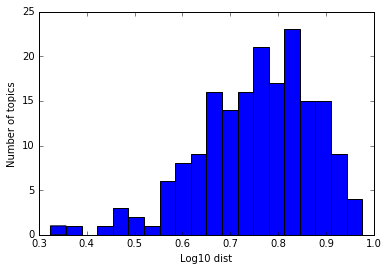

165


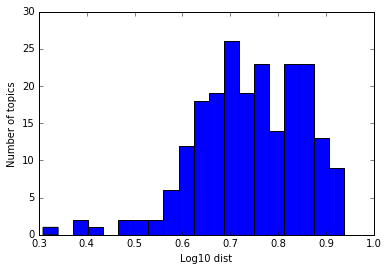

198


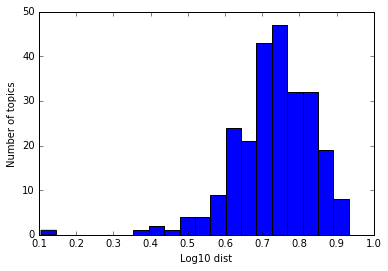

227


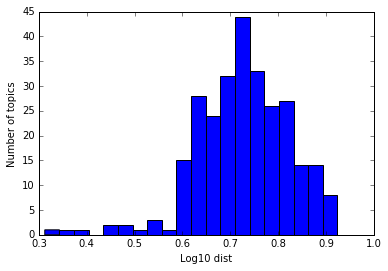

259


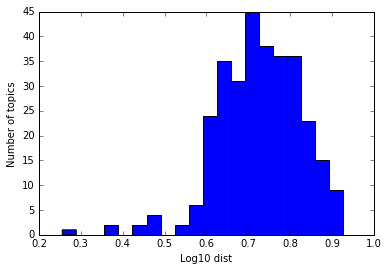

290


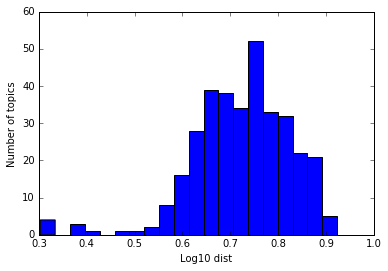

313


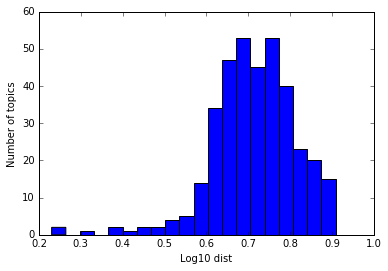

334


In [11]:
exp = Experiment(Pool(topics_filter=OptimizationTopicsFilter(eps=0.6, verbose=False), 
                      save_topics=True))
for i in xrange(10):
    model_artm = create_model()
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15, num_document_passes=1)
    #display_points(model_artm.get_phi())
    exp.collect_topics(model_artm.get_phi(), model_artm.get_theta())
    vals, bins = exp.topics_pool.topics_filter.plot_hist()
    save_hist(vals, bins, "data06_iter_{}.csv".format(i))
    print exp.topics_pool.get_basic_topics_count()

In [12]:
exp.show_basic_topics()

topic158 | [u'signatures' u'camp' u'naders' u'nevada' u'independents']
topic65 | [u'residents' u'ruling' u'schwarzenegger' u'samesex' u'couples']
topic275 | [u'flag' u'detainees' u'rumsfelds' u'chain' u'geneva']
topic231 | [u'approve' u'disapprove' u'lawnorder' u'handling' u'surgery']
topic337 | [u'wrote' u'serve' u'makes' u'club' u'stations']
topic194 | [u'ndn' u'rally' u'soft' u'dlc' u'meetup']
topic311 | [u'resistance' u'desperate' u'husseins' u'mosque' u'falluja']
topic345 | [u'arabia' u'liberals' u'relief' u'frame' u'viewers']
topic32 | [u'jun' u'signatures' u'advice' u'murphy' u'legislation']
topic156 | [u'bartlett' u'adams' u'dumb' u'spains' u'flops']
topic391 | [u'congressman' u'diedrich' u'map' u'kerryedwards' u'schrader']
topic114 | [u'panel' u'gun' u'iran' u'adviser' u'cheneys']
topic263 | [u'system' u'health' u'veterans' u'costs' u'children']
topic438 | [u'urban' u'incomes' u'cnnusa' u'hour' u'offense']
topic357 | [u'thoughts' u'activities' u'perspective' u'imagine' u'organ

In [13]:
exp.show_all_topics(sort_by_closest_topic=True)

topic0 | [u'accounting' u'connections' u'leaks' u'promising' u'limited'] | topic0
topic1 | [u'seemann' u'matsunaka' u'jeff' u'schrader' u'musgrave'] | topic1
topic163 | [u'jeff' u'matsunaka' u'murphy' u'farmer' u'stork'] | topic1
topic10 | [u'coburns' u'oksen' u'gotv' u'flag' u'tulsa'] | topic10
topic100 | [u'clarkes' u'agreed' u'testify' u'employee' u'kean'] | topic100
topic103 | [u'indictment' u'ginny' u'classified' u'humphreys' u'limbaugh'] | topic103
topic104 | [u'signed' u'smith' u'faces' u'pelosi' u'credibility'] | topic104
topic105 | [u'lincoln' u'chafee' u'plastic' u'collins' u'vet'] | topic105
topic106 | [u'nevada' u'medicare' u'consultants' u'required' u'enron'] | topic106
topic107 | [u'muslim' u'afghanistan' u'osama' u'flu' u'islamic'] | topic107
topic108 | [u'guests' u'pat' u'seiu' u'aflcio' u'chuck'] | topic108
topic109 | [u'harris' u'romero' u'wilson' u'schneider' u'retired'] | topic109
topic110 | [u'established' u'bell' u'perry' u'rumors' u'mitch'] | topic110
topic111 | 

In [14]:
exp.topics_pool.get_dist_between_topics('topic10', 'topic60')

0.002252705628052354

In [19]:
exp.show_next_topics_batch(10)

topic9:
[u'clarke' u'schneider' u'indicted' u'indictment' u'rosenberg']
topic71:
[u'ratings' u'caucuses' u'actual' u'film' u'winner']
topic87:
[u'violence' u'veterans' u'mission' u'boat' u'command']
topic117:
[u'nuclear' u'quickly' u'finish' u'precinct' u'dole']
topic139:
[u'capture' u'ralph' u'independents' u'inevitable' u'extremely']
topic151:
[u'town' u'spanish' u'abuses' u'photos' u'hearings']
topic153:
[u'salazar' u'favorite' u'car' u'initial' u'ballots']
topic154:
[u'frost' u'signs' u'armor' u'scalia' u'sirota']
topic156:
[u'incumbents' u'liberals' u'gains' u'tens' u'collected']
topic157:
[u'nancy' u'east' u'religious' u'peace' u'qaeda']


In [34]:
exp.save_dataset_to_navigator()

In [35]:
exp.save_next_topics_batch_ to_navigator(15)

In [ ]:
exp.load_assessments_from_navigator()

In [ ]:
exp.show_assessments()